# Prueba mediciones en python

## Generador de letras aleatorias

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
from math import sqrt

In [58]:
valor_a = ord('a')
distancia_z_a = ord('f')-ord('a')


def genera_letra():
    import random
    return chr(valor_a+random.randint(0, distancia_z_a))


In [59]:

def generate_inputfile(problem_length: int, inputfilename: str="in.txt") -> None:
    input_file = open(inputfilename, 'w')
    prueba = ""
    # Generamos las subcadenas del problema
    for _ in range(3):
        # Generamos cada subcadena con 3 letras de longitud
        for _2 in range(3):
            prueba += genera_letra()
        # Escribimos la subcadena en el fichero de entrada
        input_file.write(prueba+"\n")
        prueba = ""

    for _ in range(problem_length):
        prueba += genera_letra()
    input_file.write(prueba)
    input_file.close()


## Intentando lanzar un programa c++ en python

In [60]:
# TODO: add support for pandas
def ejecutar(input_filename: str = "in.txt", output_filename: str = "out.txt", problema: str = "it"):
    import subprocess
    import time
    
    input_file = open(input_filename, "r")
    output_file = open(output_filename, "w")
    # Obtener inicio de ejecución
    inicio = time.process_time()
    # Ejecutar proceso
    proc = subprocess.Popen(["./solucion", problema], stdin=input_file, stdout=output_file)    
    proc.wait()
    # Obtener final de ejecución
    final = time.process_time()
    
    # Cerrar ficheros de i/o
    input_file.close()
    output_file.close()
    
    return (final-inicio)*1000


In [61]:

def pruebas(problema: str = "it", inputfile: str = "in.txt", inicio: int = 100, 
            final: int = 10000, salto: int = 1) -> pd.DataFrame:
    # Generar fichero
    # generate_inputfile(tamanno, inputfile) # Inutil

    df_it = pd.DataFrame(columns=['tamanno', 'milis'])
    df_dyv = pd.DataFrame(columns=['tamanno', 'milis'])
    # Copilar divide y venceras
    """proc = subprocess.Popen(["g++", "dyv.cpp"])
    proc.wait()
    print("DyV compilado")
    100000000
    """
    for i in range(100, 1000, 1):
        # tamanno = int(sqrt(i))
        # Ejercutarlo en iterativa
        tamanno = i
        generate_inputfile(tamanno, inputfile)
        
        # Ejercutarlo en iterativa
        tiempo = ejecutar(input_filename=inputfile, problema=problema)
        df_it.loc[len(df_it)] = [int(tamanno), tiempo]
        # Ejecutalo con dyv 
        
        # HAcer diff

    # Copilar iterativa
    """ proc = subprocess.Popen(["g++", "iterativa.cpp"])
    proc.wait()
    print("Iterativo copilado")"""
    # Ejecutar
    """ejecutar_cmasmas(input_filename=inputfile, output_filename="iterativa.txt")
    print("Iterativo ejecutado")
    # Comparar salidas
    proc = subprocess.Popen(["meld", "iterativa.txt", "divideyvenceras.txt"])
    proc.wait()"""
    return df


In [69]:

def iguales(inputfile: str = "in.txt", tamanno:int = 1000000) -> pd.DataFrame:
    import subprocess
    # Generar fichero
    # generate_inputfile(tamanno, inputfile) # Inutil
   
    # Copilar divide y venceras
    """proc = subprocess.Popen(["g++", "dyv.cpp"])
    proc.wait()
    print("DyV compilado")
    100000000
    """
    generate_inputfile(tamanno, inputfile)
    ejecutar(input_filename=inputfile, problema="it", output_filename="iterativa.txt")    
    ejecutar(input_filename=inputfile, problema="dyv", output_filename="divideyvenceras.txt")
    # Comparar salidas
    proc = subprocess.Popen(["meld", "iterativa.txt", "divideyvenceras.txt"])
    proc.wait()


In [70]:
iguales()

In [64]:
df = pruebas("it")
df.set_index('tamanno',inplace=True)
df.to_csv("pruebas.csv")
df

,milis
tamanno,
100.0,2.718278
101.0,1.033771
102.0,0.662364
103.0,0.730974
104.0,0.859710
...,...
995.0,2.336133
996.0,5.163433
997.0,0.408779


<AxesSubplot:xlabel='tamanno'>

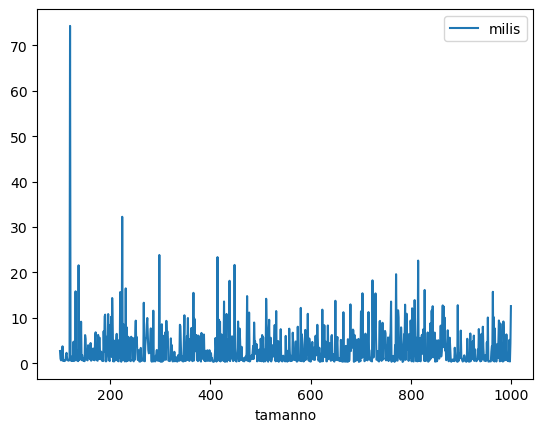

In [65]:

df.plot()

#Estos son ejemplos de usos de pandas plot de la documentacion

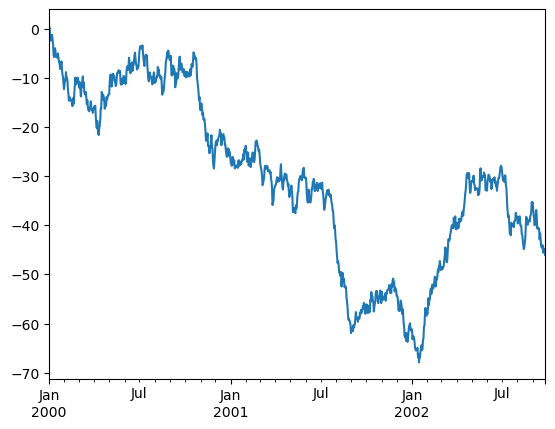

In [66]:
np.random.seed(123456)
ts = pd.Series(np.random.randn(1000), index=pd.date_range("1/1/2000", periods=1000))
ts = ts.cumsum()
ts.plot();

<Figure size 640x480 with 0 Axes>

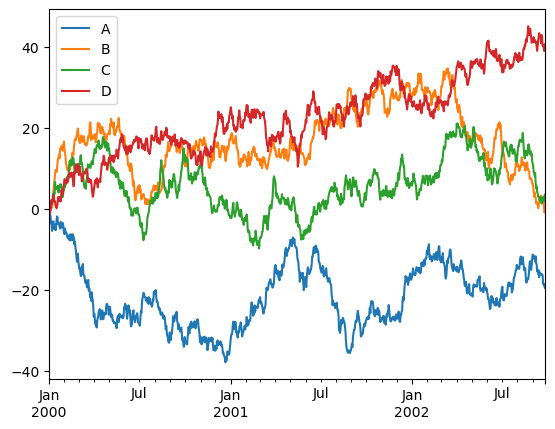

In [67]:

af = pd.DataFrame(np.random.randn(1000, 4), index=ts.index, columns=list("ABCD"))
af = af.cumsum()
plt.figure();
af.plot();

In [68]:
af = pd.DataFrame(np.random.randn(1000, 4), index=ts.index, columns=list("ABCD"))
af.cumsum()

,A,B,C,D
2000-01-01,0.879831,0.573687,-0.733935,-0.424597
2000-01-02,2.516696,1.822034,-2.555503,0.936397
2000-01-03,2.788408,1.532243,-3.473753,0.142107
2000-01-04,3.818869,1.704804,-4.219466,-0.062224
2000-01-05,3.988306,2.918538,-4.080365,1.318446
...,...,...,...,...
2002-09-22,17.660399,15.619069,-58.925738,-31.283101
2002-09-23,16.449870,14.210683,-57.984161,-31.625548
2002-09-24,16.671901,14.263290,-55.890947,-30.560639
2002-09-25,18.450062,13.349423,-55.920952,-30.960486
